# SECOND HAND CAR RE-SELLING PRICE ANALYSIS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # fundamental package for scientific computation in python
import pandas as pd #package used for working with data sets
import matplotlib.pyplot as plt #library for data visualization in forms of plots,graphs and charts
import seaborn as sns #library used to visualize random distribution
import statsmodels.api as sm #libarary used to work with statistical models
import os  #importing python library
sns.set()  #imporing customized seaborn themes

from math import * #importing all the classes and functions in maths library
import warnings  #to alert the user about some conitions in the program
warnings.filterwarnings('ignore')


## Loading the Raw Data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML2/week1/Second hand cars reselling price.csv')

In [5]:
data.head()   

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [7]:
data.shape

(4345, 9)

## Preprocessing

In [8]:
data.describe(include="all") #calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [9]:
data.isnull().sum() #finding how many null values in the data set

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [10]:
data1 = data.drop(['Model'], axis = 1)  # there are too many repitions but lesser value addition to the model

In [11]:
data1.head() # when a data drop is done always print the head to confirm

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [12]:
data1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [13]:
data_no_mv =  data1.dropna(axis=0) #This is to drop null values ;to drop coloumns axis=1, to drop raws axis=0

In [14]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Dealing with Outiers

In [15]:
# Exceptions in the data set. To understand the behviour we need to plot it.

In [16]:
# Plotting against price

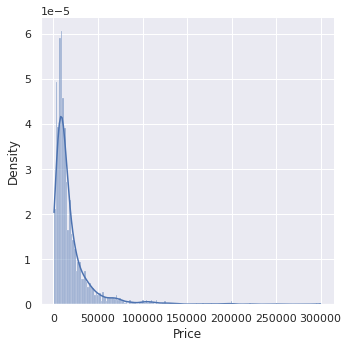

In [17]:
sns.displot(data_no_mv['Price'], kde = 'true', stat='density') 
plt.show()

In [18]:
#from the pdf of prices we can say that the distribution is positively skewed. To remove the outliers we can use quntile method.

In [19]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


<function matplotlib.pyplot.show(*args, **kw)>

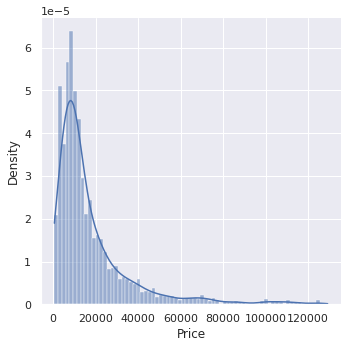

In [20]:
sns.displot(data_1['Price'], kde = "true", stat = 'density')
plt.show

In [21]:
# Still there is a skewness in our PDF for price.but this is something that cannot be ignored

In [22]:
# Plotting aginst mileage

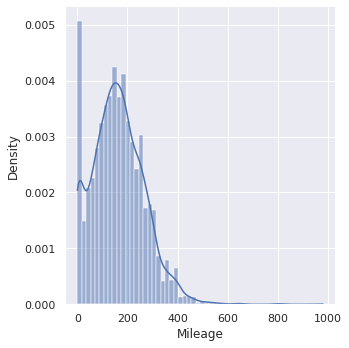

In [23]:
sns.displot(data_no_mv['Mileage'], kde ="true", stat = 'density') 
plt.show()

In [24]:
q1 = data_1['Mileage'].quantile(0.99) # considering quantile method
data_2 = data_1[data_no_mv['Mileage'] < q1]
data_2.describe() 

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


<function matplotlib.pyplot.show(*args, **kw)>

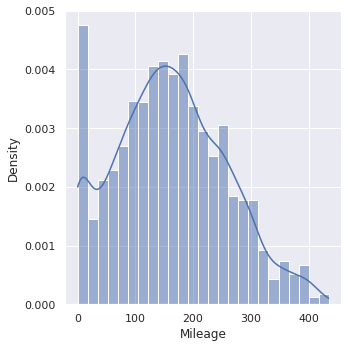

In [25]:
sns.displot(data_2['Mileage'], kde = "true", stat = 'density') # plotting after considering quantile method
plt.show

In [26]:
# Plotting against EngineV


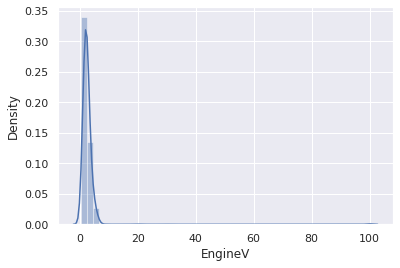

In [27]:
sns.distplot(data_no_mv['EngineV']) 
plt.show()

In [28]:
# There is a huge outlier in the EngineV. On observing data manually there is a value of 99.99 where as the other in the range of 0.6 to 6.5
# to deal with this maximum value can be set to 6.5

In [29]:
data_3 = data_2[data_2['EngineV'] < 6.5]

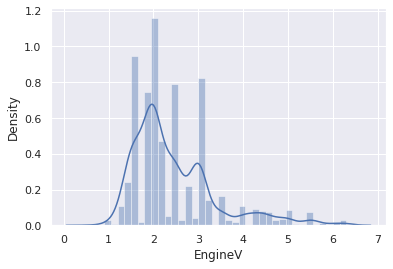

In [30]:
sns.distplot(data_3['EngineV'])
plt.show()

In [31]:
# Plotting against years

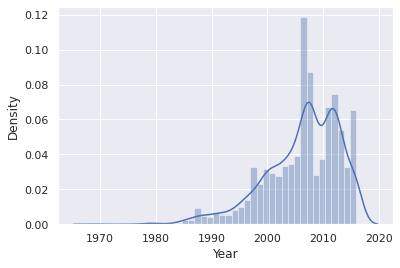

In [32]:
sns.distplot(data_no_mv['Year']) 
plt.show()

In [33]:
# Since this is skewed negatively we are using 1% quantile

In [34]:
q3 = data_3['Year'].quantile(0.01) # considering quantile method
data_4 = data_3[data_3['Year'] > q3]
data_4.describe() 

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


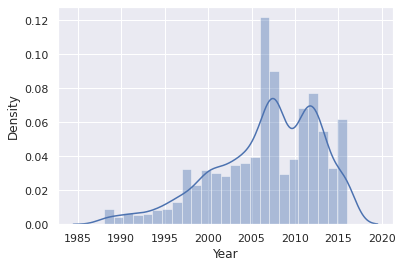

In [35]:
sns.distplot(data_4['Year'])
plt.show()

## Getting the cleaned dataset

In [36]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


## Checking the OLS assumptions

In [37]:
# Plotting independent variables against dependenet variable "Price"

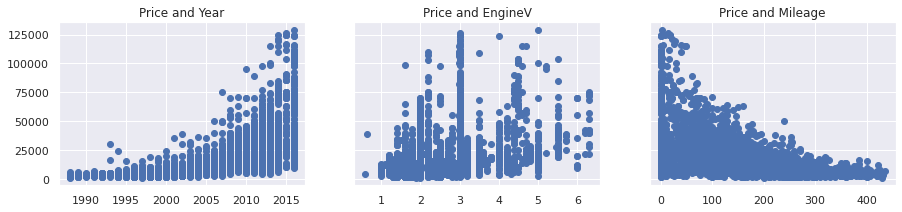

In [38]:
f,(ax1,ax2,ax3) = plt.subplots( 1, 3, sharey= True , figsize= (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

## Log Transformation

In [39]:
# Nomalizing skewed data. Always have to use preprocessed data. Used on dependent variable always

In [40]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


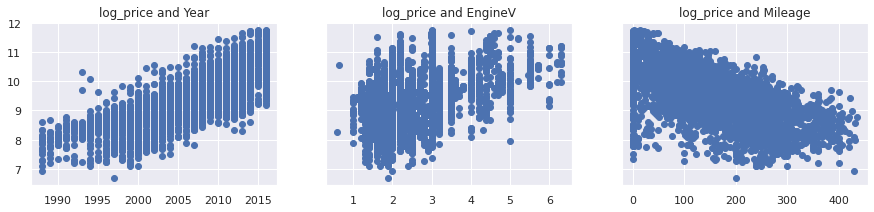

In [41]:
f,(ax1,ax2,ax3) = plt.subplots( 1, 3, sharey= True , figsize= (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [42]:
# Now the pattern is more linear

In [43]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1) # dropping price from cleaned data

## Removing Multicollinerity

In [44]:
#Multicollinearity is a statistical concept where several independent variables in a model are correlated

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(variables.values ,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [47]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [48]:
# We can see that "Year" has high muticollinearity. We shall drop this

In [49]:
data_no_multicollinearity = data_cleaned.drop(['Year'] , axis = 1)

In [50]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [51]:
# All the data here are categorical.need to convert it to numerical data

## Creating Dummies

In [52]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [53]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [54]:
# Now the dataset is completely numerical.Now data needs to be re-arranged to make data frame a bit tidy.

In [55]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [56]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [57]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Downloading Preprocessed Data

In [58]:
data_preprocessed.to_csv('data_preprocessed.csv')
data_preprocessed = pd.read_csv('data_preprocessed.csv')

## Linear Regression Model

In [59]:
targets = data_preprocessed['log_price'] #dependent Variable
inputs = data_preprocessed.drop(['log_price'], axis= 1) # Independent variables

## Scaling the Data

In [60]:
#  transforming your data so that it fits within a specific scale

In [61]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [62]:
scalar = StandardScaler()
scalar.fit(inputs)

StandardScaler()

In [63]:
input_scaled = scalar.transform(inputs)

## Test Train Split

In [64]:
# usually dataset is splitted as 80% for training and 20% for testing. It is recommended to have 2 data sets for the two

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets,test_size = 0.25, random_state=365)

In [66]:
x_train

array([[ 1.52377477, -0.44490826, -0.89591293, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 1.50137949,  0.25577519, -0.26383071, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 0.6987327 ,  1.92904912, -0.57987182, ..., -0.16209221,
        -0.75037043, -3.11164272],
       ...,
       [-1.01405823,  0.64271979,  3.21262147, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 0.7229196 ,  1.24928159,  0.05221039, ...,  6.16932785,
        -0.75037043, -3.11164272],
       [ 1.55244073, -0.58086177, -0.47452478, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [67]:
y_train

3634     9.433484
3609     9.464983
2713     8.318742
1229     9.449357
1735     8.779404
          ...    
428     11.074421
859     10.434116
801      9.928180
2740     7.824046
3666    10.488493
Name: log_price, Length: 2900, dtype: float64

## Creating the Regression

In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [69]:
yhat = reg.predict(x_train)

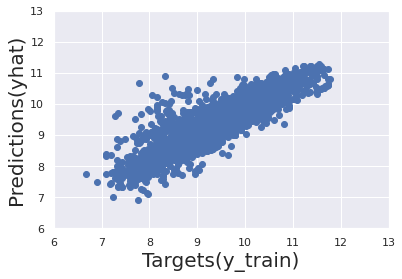

In [70]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)', fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [71]:
# Model is optimized.

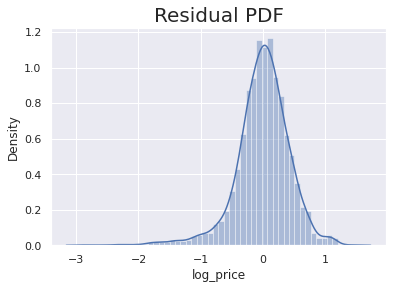

In [72]:
sns.distplot(y_train - yhat)
plt.title("Residual PDF", size = 20)
plt.show()

In [73]:
reg.score(x_train , y_train)

0.7510953340203845

Finding Weight and Bias

In [74]:
reg.intercept_

9.417778680040557

In [75]:
reg.coef_

array([ 7.94367227e-05, -4.53360928e-01,  2.09779824e-01, -8.89808683e-05,
        3.68923769e-03, -1.45316904e-01, -1.90191299e-01, -6.98039069e-02,
       -9.93064860e-02, -1.46073802e-01, -1.01423181e-01, -2.04318303e-01,
       -1.24424036e-01, -1.67834984e-01, -1.20296806e-01, -3.81914163e-02,
       -1.50948831e-01,  3.20337110e-01])

In [76]:
reg_summary = pd.DataFrame(inputs.columns.values , columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Unnamed: 0,0.000079
1,Mileage,-0.453361
2,EngineV,0.209780
3,Brand_BMW,-0.000089
4,Brand_Mercedes-Benz,0.003689
5,Brand_Mitsubishi,-0.145317
6,Brand_Renault,-0.190191
7,Brand_Toyota,-0.069804
8,Brand_Volkswagen,-0.099306
9,Body_hatch,-0.146074


In [77]:
# For a positive value of the dummy means it is directly proportional to the target variable and for the negative value for the dummy, the dummy variable is inversley proportional to the target variable.
#The values of brans are positive and negative based on the value of the "Audi" brand, as it was the benchmark variable while we assigned the dummies. This, for positive value of a brand means this brand car is expensive than the "Audi" brand car, and if it's negative means it's cheaper than the "Audi".

In [79]:
y_hat_test = reg.predict(x_test)

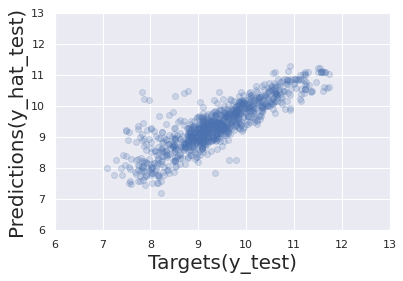

In [80]:
plt.scatter(y_test , y_hat_test , alpha = 0.2)
plt.xlabel('Targets(y_test)',fontsize=20)
plt.ylabel('Predictions(y_hat_test)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [81]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Predictions'])
df_pf.head()

,Predictions
0,10620.814674
1,3489.277749
2,7436.122081
3,7452.030901
4,11296.676589


In [82]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10620.814674,2300.0
1,3489.277749,2800.0
2,7436.122081,2500.0
3,7452.030901,6400.0
4,11296.676589,9150.0
...,...,...
962,3797.194409,2500.0
963,10731.508461,16500.0
964,30674.187875,40500.0
965,11276.556391,8200.0


In [83]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,10620.814674,2300.0,-8320.814674,361.774551
1,3489.277749,2800.0,-689.277749,24.617062
2,7436.122081,2500.0,-4936.122081,197.444883
3,7452.030901,6400.0,-1052.030901,16.437983
4,11296.676589,9150.0,-2146.676589,23.460946
...,...,...,...,...
962,3797.194409,2500.0,-1297.194409,51.887776
963,10731.508461,16500.0,5768.491539,34.960555
964,30674.187875,40500.0,9825.812125,24.261265
965,11276.556391,8200.0,-3076.556391,37.518980


In [84]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,967.000000,967.000000,967.000000,967.000000
mean,15907.764830,17841.522058,1933.757228,39.127282
std,13176.701424,19416.925011,10439.427404,77.722558
min,1341.922689,1200.000000,-31976.953658,0.044796
25%,7378.855797,6900.000000,-2100.287826,11.006692
50%,11648.416233,11400.000000,75.934644,23.653678
75%,19992.451291,20200.000000,3125.552912,40.216906
max,80302.366823,126000.000000,84777.135829,1279.078146


In [ ]:
#From the descriptive statistics of the df_pf data frame, we can say that for 
#most of the observations our predictions were quite good, but as there were 
#large number of outliers, our model didn't performed well there

In [85]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
698,30513.662656,30500.00,-13.662656,0.044796
907,3802.752186,3800.00,-2.752186,0.072426
549,3754.183365,3750.00,-4.183365,0.111556
272,9816.665911,9800.00,-16.665911,0.170060
883,36063.235499,36000.00,-63.235499,0.175654
380,3493.695693,3500.00,6.304307,0.180123
110,25550.108898,25500.00,-50.108898,0.196505
102,28958.394904,28900.00,-58.394904,0.202058
379,17841.207138,17800.00,-41.207138,0.231501
630,8775.943667,8800.00,24.056333,0.273367


#Conclusion

From our analysis and the linear regression model, we can say that our model fits the data set and predicts the correct values fairly good but it's not an outstanding model. We can also create a much better fitting model but this is always a trail and test method, the more our model is tested, the more perfect it becomes.